In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop(['Cabin','Ticket','Name','Fare','PassengerId'],axis=1)

In [5]:
ndf = df.copy()

In [6]:
ndf.loc[:,'Embarked'].replace(['C','S','Q'],['Cherbourg','Southampton','Queenstown'],inplace=True)
ndf.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)
ndf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,No,3,male,22.0,1,0,Southampton
1,Yes,1,female,38.0,1,0,Cherbourg
2,Yes,3,female,26.0,0,0,Southampton
3,Yes,1,female,35.0,1,0,Southampton
4,No,3,male,35.0,0,0,Southampton


<AxesSubplot:>

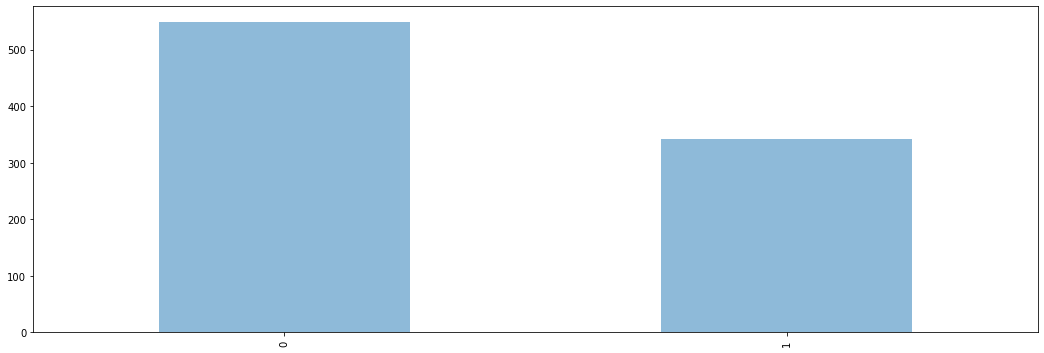

In [7]:
import matplotlib.pyplot as plt       
fig = plt.figure(figsize=(18,6))      

df.Survived.value_counts().plot(kind="bar",alpha=0.5)

E:\Conda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


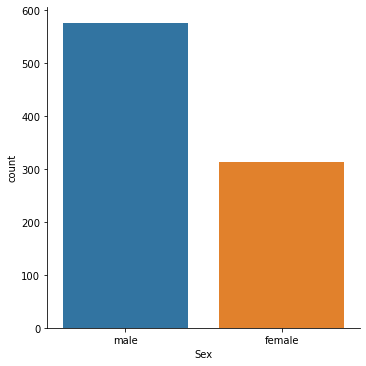

In [8]:
import seaborn as sns
sns.factorplot('Sex',data=df,kind='count')

E:\Conda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


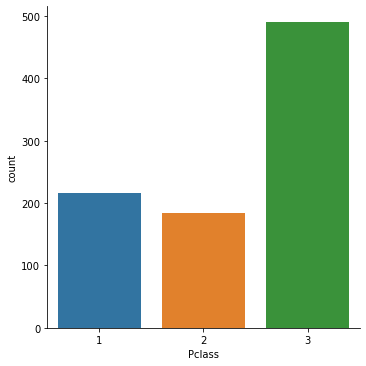

In [9]:
sns.factorplot('Pclass',data=df,kind='count')

E:\Conda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


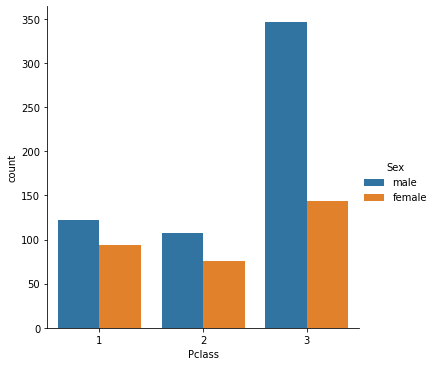

In [10]:
sns.factorplot('Pclass',data=df,hue='Sex',kind='count')

E:\Conda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


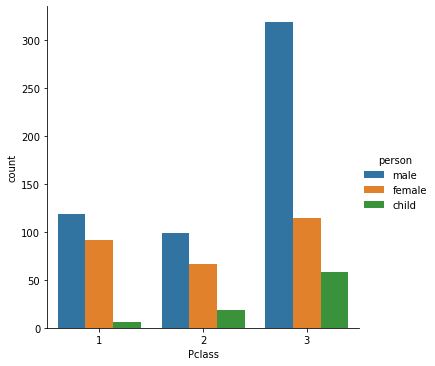

In [11]:
def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

df['person'] = df[['Age','Sex']].apply(titanic_children,axis=1)
sns.factorplot('Pclass',data=df,hue='person',kind='count')

<AxesSubplot:>

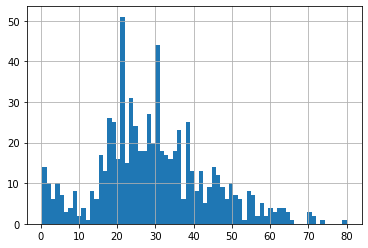

In [12]:
df['Age'].hist(bins=70)

E:\Conda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


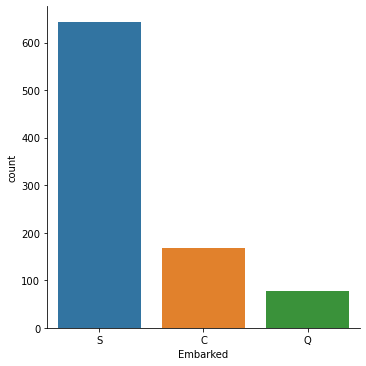

In [13]:
sns.factorplot('Embarked',data=df,kind='count')

E:\Conda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


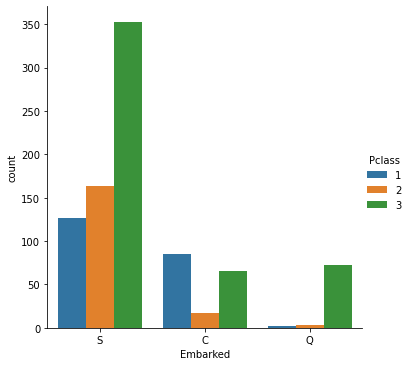

In [14]:
sns.factorplot('Embarked',data=df,hue='Pclass',kind='count')

In [15]:
df['Alone'] = df.Parch + df.SibSp
df['Alone'].loc[df['Alone']>0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Without Family'

E:\Conda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


E:\Conda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


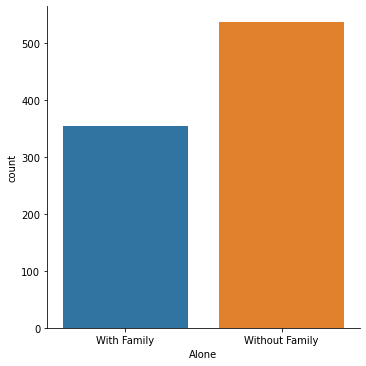

In [16]:
sns.factorplot('Alone',kind='count',data=df)

E:\Conda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


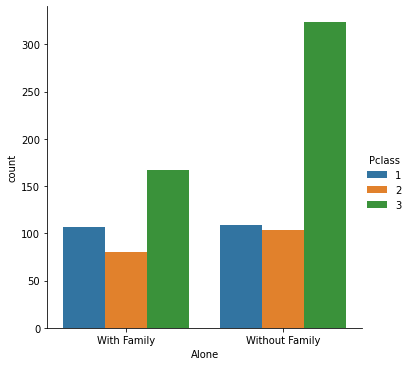

In [17]:
sns.factorplot('Alone',kind='count',data=df,hue='Pclass')

E:\Conda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


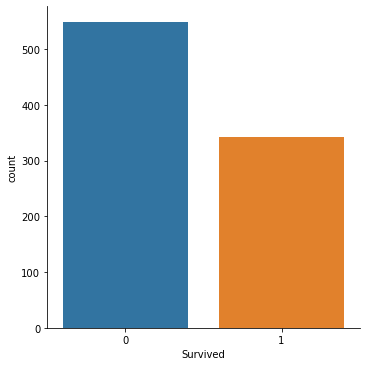

In [18]:
sns.factorplot('Survived',data=df,kind='count')

E:\Conda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


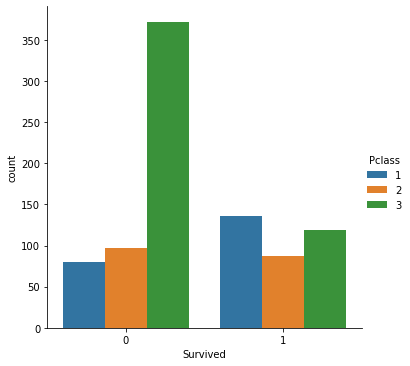

In [19]:
sns.factorplot('Survived',data=df,kind='count',hue='Pclass')

<AxesSubplot:>

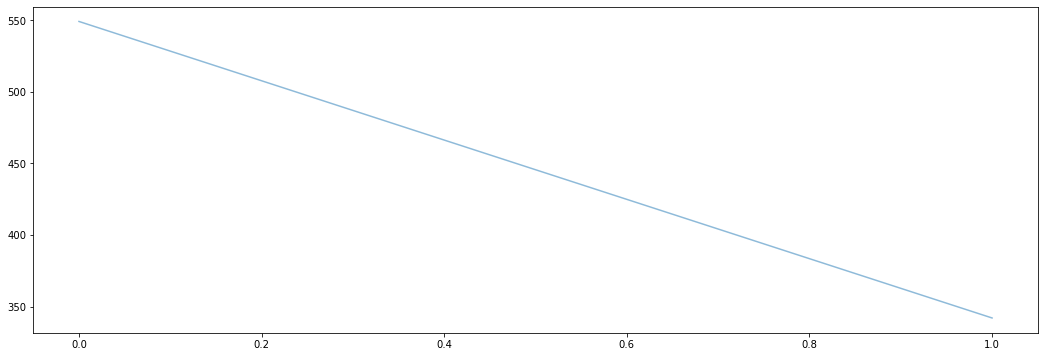

In [20]:
import matplotlib.pyplot as plt       
fig = plt.figure(figsize=(18,6))      

df.Survived.value_counts().plot(kind="line",alpha=0.5)

<AxesSubplot:xlabel='sex', ylabel='count'>

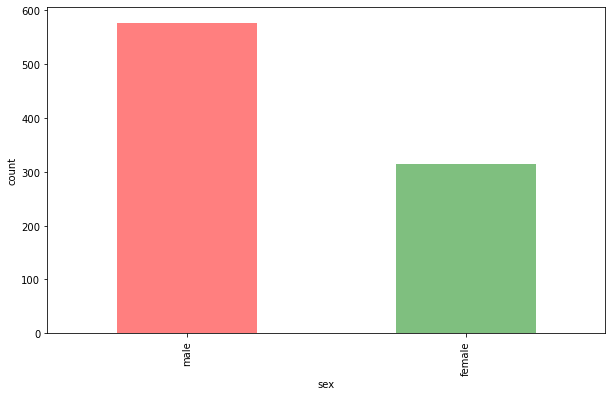

In [21]:
import matplotlib.pyplot as plt       
fig = plt.figure(figsize=(10,6))      
plt.xlabel('sex')
plt.ylabel('count')
df.Sex.value_counts().plot(kind="bar",alpha=0.5,color = ['r','g'])

<AxesSubplot:xlabel='Total', ylabel='Frequency'>

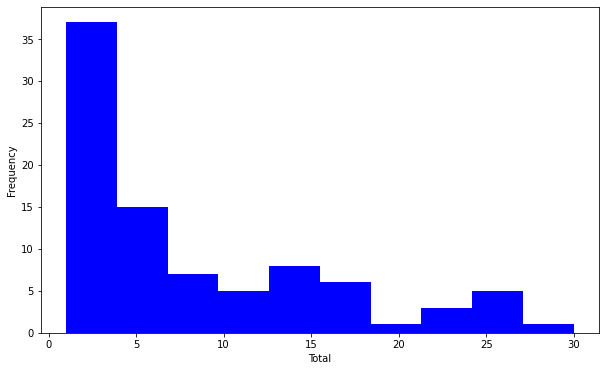

In [22]:
import matplotlib.pyplot as plt       
fig = plt.figure(figsize=(10,6))      
plt.xlabel('Total')
plt.ylabel('Age')
df.Age.value_counts().plot(kind="hist",alpha=1,color = ['b'])

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,person,Alone
0,0,3,male,22.0,1,0,S,male,With Family
1,1,1,female,38.0,1,0,C,female,With Family
2,1,3,female,26.0,0,0,S,female,Without Family
3,1,1,female,35.0,1,0,S,female,With Family
4,0,3,male,35.0,0,0,S,male,Without Family


<AxesSubplot:>

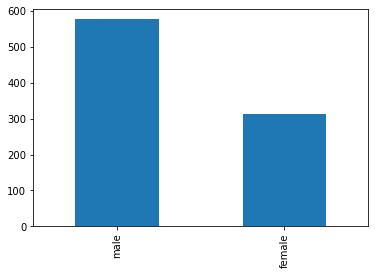

In [24]:
x = df['Sex'].value_counts()
total = df['Sex'].count()

SSex = []
TSex = [total]
x.plot(kind = 'bar')

<AxesSubplot:>

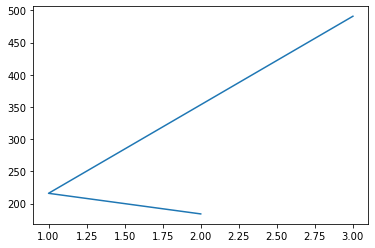

In [25]:
x = df['Pclass'].value_counts()
total = df['Sex'].count()

SSex = []
TSex = [total]
x.plot(kind = 'line')

<AxesSubplot:ylabel='Frequency'>

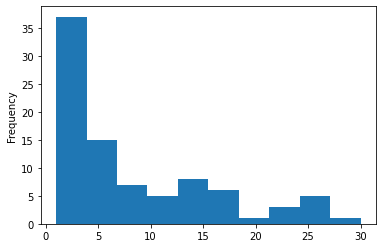

In [26]:
x = df['Age'].value_counts()
total = df['Sex'].count()

SSex = []
TSex = [total]
x.plot(kind = 'hist')

<AxesSubplot:>

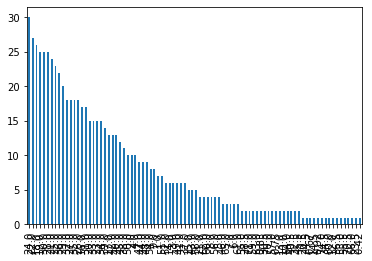

In [32]:
x = df['Age'].value_counts()
total = df['Sex'].count()

SSex = []
TSex = [total]
x.plot(kind = 'bar')

<AxesSubplot:ylabel='Embarked'>

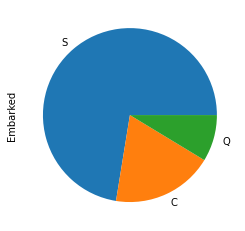

In [27]:
x = df['Embarked'].value_counts()
total = df['Sex'].count()

SSex = []
TSex = [total]
x.plot(kind = 'pie')

<AxesSubplot:>

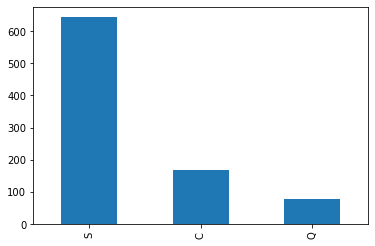

In [31]:
x = df['Embarked'].value_counts()
total = df['Sex'].count()

SSex = []
TSex = [total]
x.plot(kind = 'bar')